## Equipo:
- Damarys Valenzuela Santos
- Delia Michelle Trigo Fernández
- Ana Sofía Avila Gálvez

___
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/08/Pareto_Efficient_Frontier_for_the_Markowitz_Portfolio_selection_problem..png" width="300px" height="100px" />


# Proyecto Final

En el proyecto final diseñarás un portafolio de inversión utilizando activos (o ETFs) reales de tu preferencia. Utilizarás todas las herramientas vistas a lo largo del curso para este fin, y después, evaluarás qué tan buena hubiera sido tu inversión de haber invertido en este portafolio.

El proyecto se realizará en equipos de mínimo dos (2) y máximo tres (3) personas. Ni más, ni menos. Para esto, deberán conformar los equipos en este momento, y designar a un miembro del equipo que me envíe un correo con los nombres de los integrantes.
___

## 1. Elección de activos  (10%)

Lo primero es elegir los activos que van a utilizar. 

Escoger 15 acciones de la bolsa de valores de EUA 

En cualquiera de los tres casos deben explicar detalladamente la elección de cada uno de los activos y/o ETFs que elijan.

Todos estos activos tienen que tener:
- Market beta
- R2 del beta
- Hacer bootstrap de R2 y Beta, ¿Cuál es la probabiliad que la beta de X activo sea > 1? Histograma de R2 y beta
- Analisis de la acción, P/E ratio, que clase es, que hace la empresa, cuanto vale la empresa, etc.  


In [92]:
import yfinance as yf
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import random

In [93]:
tickers = ['NVDA', 'AMZN','TSLA','VTI',
           'NFLX', 'BLK','GOOGL','AAPL','AMD','JPM','MSFT','META',
        'C','MA','SMCI','BA'
          ]
start_date = '2015-01-01'


St = yf.download(tickers, start=start_date)['Adj Close']
St.head()
rt = St.pct_change().dropna()


[*********************100%%**********************]  16 of 16 completed


In [94]:
# Normalizamos todos los activos 
stocks = list(St.keys())
normalized = St.copy()
keys = []
for i in stocks:
    normalized['normalized_' + i] = normalized[i]/normalized[i].iloc[0]
    keys.append('normalized_' + i)

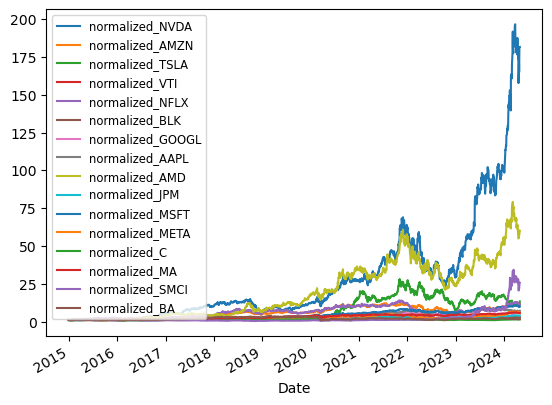

In [95]:
# Veamos la normalización 
ax = normalized[['normalized_NVDA',
             'normalized_AMZN',
             'normalized_TSLA',
             'normalized_VTI',
             'normalized_NFLX',
             'normalized_BLK',
             'normalized_GOOGL',
             'normalized_AAPL',
             'normalized_AMD',
             'normalized_JPM',
             'normalized_MSFT',
             'normalized_META',
             'normalized_C',
             'normalized_MA',
             'normalized_SMCI',
                'normalized_BA'
                ]].plot()
plt.legend(fontsize='small')
plt.show()

In [97]:
betas={}
beta = []
R2 = []
tick = []
for i in tickers:
    # obten el data frame
    flag_df=rt[[i,'VTI']]
    # Regresion
    model=LinearRegression()
    X=flag_df[['VTI']]
    y=flag_df[[i]]
    model.fit(X,y)
    # Beta
    bet=model.coef_[0][0]
    # R2
    predicciones=model.predict(X)
    resultad_r2=r2_score(y_pred=predicciones,y_true=y)
    # juntar todo
    rendimiento=np.mean(flag_df[i])
    betas[i]=[beta,resultad_r2,rendimiento*252]
    # Agregar a lista
    beta.append(bet)
    R2.append(resultad_r2)
    tick.append(i)


/Users/sofi/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3462: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [98]:
tabla = pd.DataFrame()
tabla['Tickers'] = tick
tabla['Betas'] = beta
tabla['r2'] = R2
tabla

,Tickers,Betas,r2
0,NVDA,1.692506e+00,0.409220
1,AMZN,1.117112e+00,0.381813
2,TSLA,1.476059e+00,0.228043
3,VTI,1.039161e-15,1.000000
4,NFLX,1.159528e+00,0.225493
5,BLK,1.234546e+00,0.660221
6,GOOGL,1.120034e+00,0.509760
7,AAPL,1.170622e+00,0.551282
8,AMD,1.636374e+00,0.252786
9,JPM,1.109885e+00,0.544513


In [99]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import pandas as pd

# Bootstrap de beta y R2 para todos los activos

n = 100
results2 = pd.DataFrame(columns=['beta_' + i for i in tickers if i != 'VTI'] + ['r2_' + i for i in tickers if i != 'VTI'])

for i in tickers:
    if i != 'VTI':
        betas = []
        r2s = []
        for j in range(n):
            bootstrap_df = rt.sample(len(rt), replace=True)
            X = bootstrap_df[['VTI']]
            y = bootstrap_df[[i]]
            model = LinearRegression().fit(X, y)
            beta = model.coef_[0][0]
            predictions = model.predict(X)
            r2 = r2_score(y_true=y, y_pred=predictions)
            betas.append(beta)
            r2s.append(r2)
        results2['beta_' + i] = betas
        results2['r2_' + i] = r2s      

In [100]:
prob_df = pd.DataFrame(columns=['ticker', 'prob_beta'])

for i in tickers:
    if i != 'VTI':
        prob_beta = np.mean([i > 1 for i in results2['beta_'+ i]])
        prob_df = prob_df.append({'ticker': i, 'prob_beta': prob_beta}, ignore_index=True)
prob_df

/var/folders/j9/s0r5hbrj0fgf3rxfcn89tyd00000gn/T/ipykernel_2281/4247440469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prob_df = prob_df.append({'ticker': i, 'prob_beta': prob_beta}, ignore_index=True)
/var/folders/j9/s0r5hbrj0fgf3rxfcn89tyd00000gn/T/ipykernel_2281/4247440469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prob_df = prob_df.append({'ticker': i, 'prob_beta': prob_beta}, ignore_index=True)
/var/folders/j9/s0r5hbrj0fgf3rxfcn89tyd00000gn/T/ipykernel_2281/4247440469.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  prob_df = prob_df.append({'ticker': i, 'prob_beta': prob_beta}, ignore_index=True)
/var/folders/j9/s0r5hbrj0fgf3rxfcn89tyd00000gn/T/ipykernel_2281/4247440469.py:6: FutureWarning: The fra

,ticker,prob_beta
0,NVDA,1.000
1,AMZN,0.984
2,TSLA,1.000
3,NFLX,0.994
4,BLK,1.000
5,GOOGL,1.000
6,AAPL,1.000
7,AMD,1.000
8,JPM,0.998
9,MSFT,1.000


# NVDA

- **Elección del activo:** Se eligió ya que es una empresa líder en tecnología, especialmente en el campo de la computación gráfica, inteligencia artificial y tecnologías de visualización.
- **Análisis de la acción:**
- **P/E ratio:** 72.75
- **Clase:** Es una empresa de tecnología y se clasifica comúnmente en la industria de semiconductores y hardware de computadoras.
- **¿Qué hace la empresa?:** NVIDIA Corporation se dedica al diseño, desarrollo y fabricación de unidades de procesamiento gráfico (GPU), así como a productos relacionados con tecnologías de inteligencia artificial, realidad virtual y computación de alto rendimiento.
- **¿Cuánto vale la empresa?:**

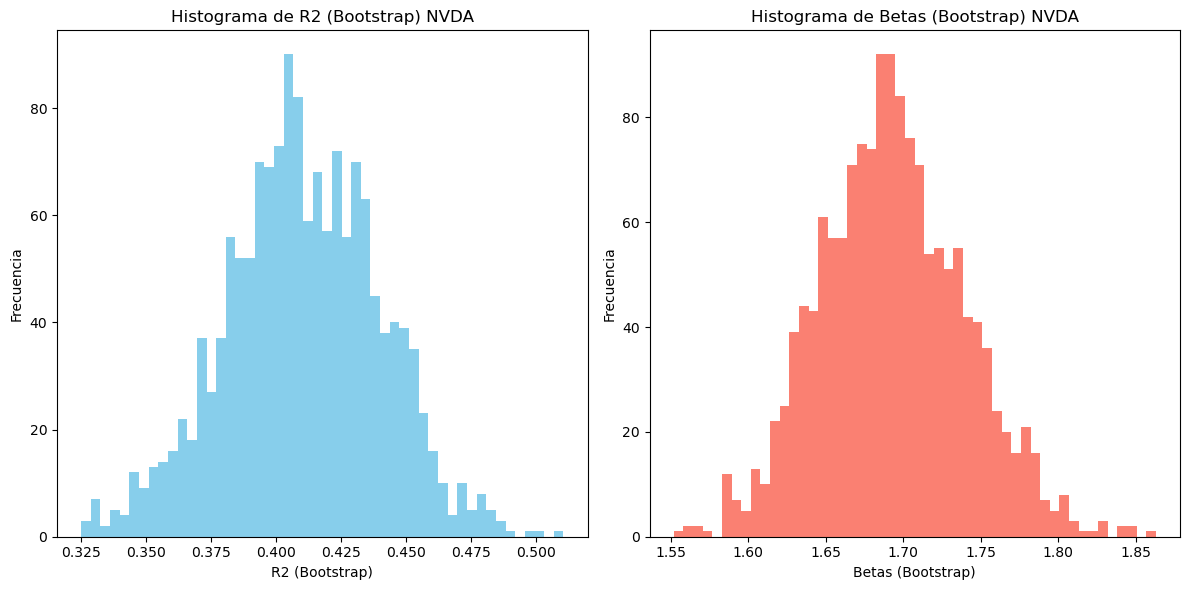

In [69]:
import matplotlib.pyplot as plt

# Graficar histograma de R2 (Bootstrap) para NVDA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['NVDA'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) NVDA')

# Graficar histograma de BETAS (Bootstrap) para NVDA
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['NVDA'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) NVDA')

plt.tight_layout()
plt.show()


# AMZN

- **Elección del activo:** Se eligió ya que es uno de los gigantes tecnológicos y minoristas más prominentes en el mundo. 
- **Análisis de la acción:**
- **P/E ratio:** 91.6
- **Clase:** Es una empresa de tecnología y comercio electrónico.
- **¿Qué hace la empresa?:** Conocida principalmente por ser una de las mayores plataformas de comercio electrónico del mundo, pero también ofrece servicios en la nube a través de Amazon Web Services (AWS), produce hardware como los dispositivos Kindle y Echo, produce contenido de video a través de Amazon Prime Video, y está involucrada en una amplia gama de otros negocios, incluyendo logística y servicios de transmisión de música.
- **¿Cuánto vale la empresa?:**

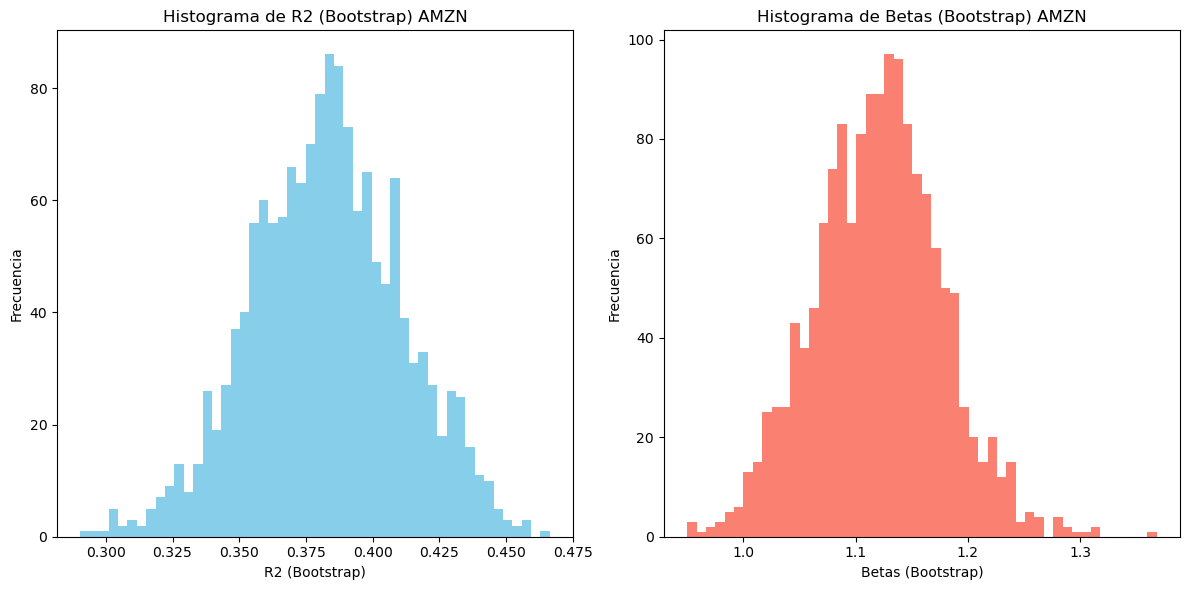

In [48]:
# Graficar histograma de R2 (Bootstrap) para AMZN
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['AMZN'], bins=50, color='skyblue')
plt.xlabel('R2 (BootstrapA)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) AMZN')

# Graficar histograma de BETAS (Bootstrap) para AMZN
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['AMZN'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) AMZN')

plt.tight_layout()
plt.show()



# TSLA

- **Elección del activo:** Se eligió debido a su popularidad en el mercado, su volatilidad, su posición en la industria de vehículos eléctricos y su relevancia en el ámbito tecnológico y ambiental.
- **Análisis de la acción:**
- **P/E ratio:** 49.4
- **Clase:** Tesla, Inc. es una empresa de clase de acciones comunes.
- **¿Qué hace la empresa?:** Conocida principalmente por su enfoque en la fabricación de vehículos eléctricos, incluidos automóviles, vehículos utilitarios y camiones. Además, la empresa está involucrada en la producción de energía limpia y soluciones de almacenamiento de energía a través de sus productos de energía solar y almacenamiento de energía.
- **¿Cuánto vale la empresa?:**

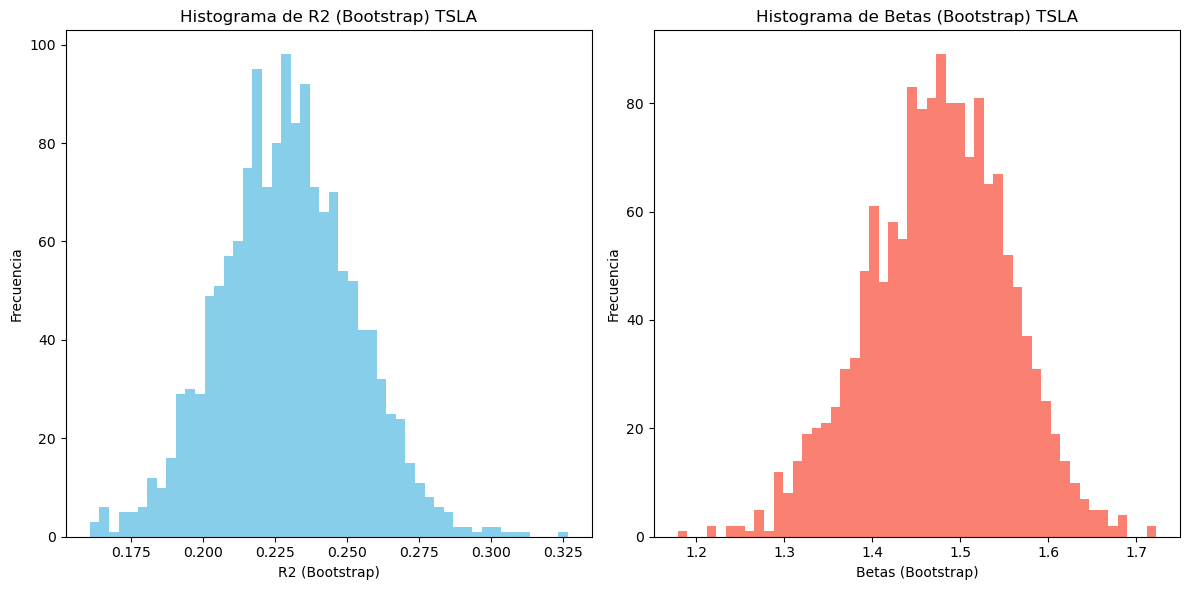

In [63]:
# Graficar histograma de R2 (Bootstrap) para TSLA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['TSLA'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) TSLA')

# Graficar histograma de BETAS (Bootstrap) para TSLA
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['TSLA'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) TSLA')

plt.tight_layout()
plt.show()

# VTI

- Elección del activo:
- Análisis de la acción:
- P/E ratio:
- Clase:
- ¿Qué hace la empresa?:
- ¿Cuánto vale la empresa?:

# NFLX

- **Elección del activo:** Se eligió debido a su prominencia en el mercado del streaming de video, su impacto en la industria del entretenimiento y su presencia en los mercados financieros.
- **Análisis de la acción:**
- **P/E ratio:** 38.95
- **Clase:** Netflix se clasifica como una empresa de tecnología y comunicaciones, específicamente en el sector de entretenimiento y medios de comunicación.
- **¿Qué hace la empresa?:** Es una empresa de entretenimiento que ofrece una amplia variedad de contenidos en línea, incluyendo películas, series de televisión, documentales y contenido original. Utiliza un modelo de suscripción mensual para brindar acceso a su biblioteca de contenido a través de dispositivos conectados a internet.
- **¿Cuánto vale la empresa?:**

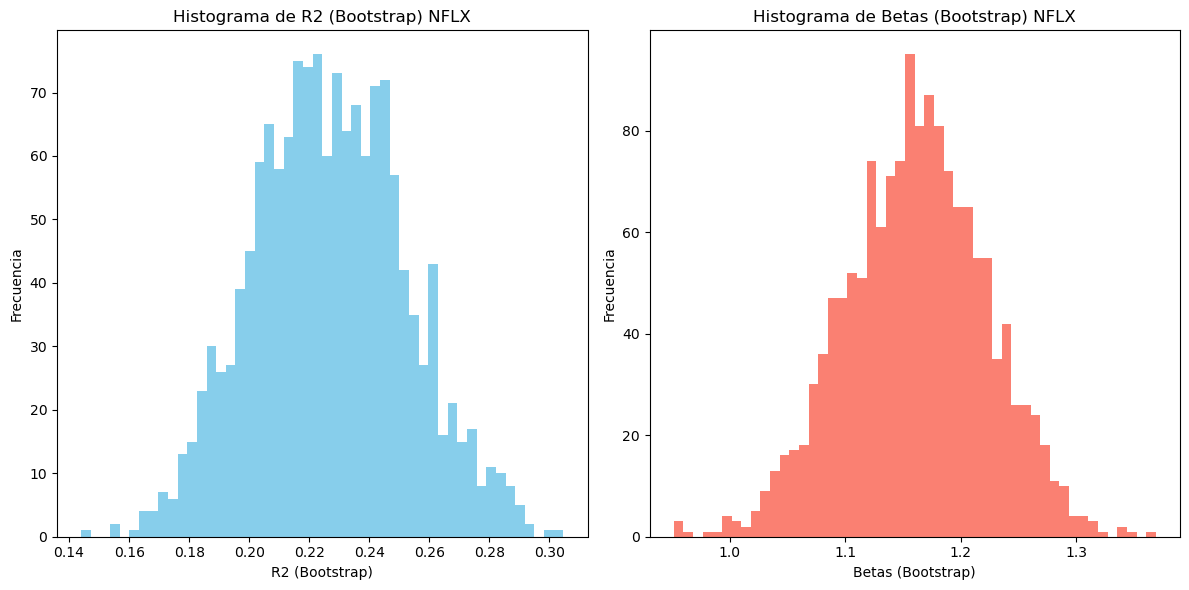

In [51]:
# Graficar histograma de R2 (Bootstrap) para NFLX
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['NFLX'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) NFLX')

# Graficar histograma de BETAS (Bootstrap) para NFLX
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['NFLX'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) NFLX')

plt.tight_layout()
plt.show()

# BLK

- **Elección del activo:**
- **Análisis de la acción:**
- **P/E ratio:**  22.1
- **Clase:** BlackRock es una empresa de gestión de inversiones y gestión de activos. Es una de las mayores empresas de gestión de inversiones del mundo.
- **¿Qué hace la empresa?:** Proporciona una amplia gama de servicios financieros a clientes institucionales y minoristas en todo el mundo. Sus servicios incluyen gestión de activos, gestión de riesgos, asesoramiento en inversiones, tecnología financiera y más.
- **¿Cuánto vale la empresa?:**

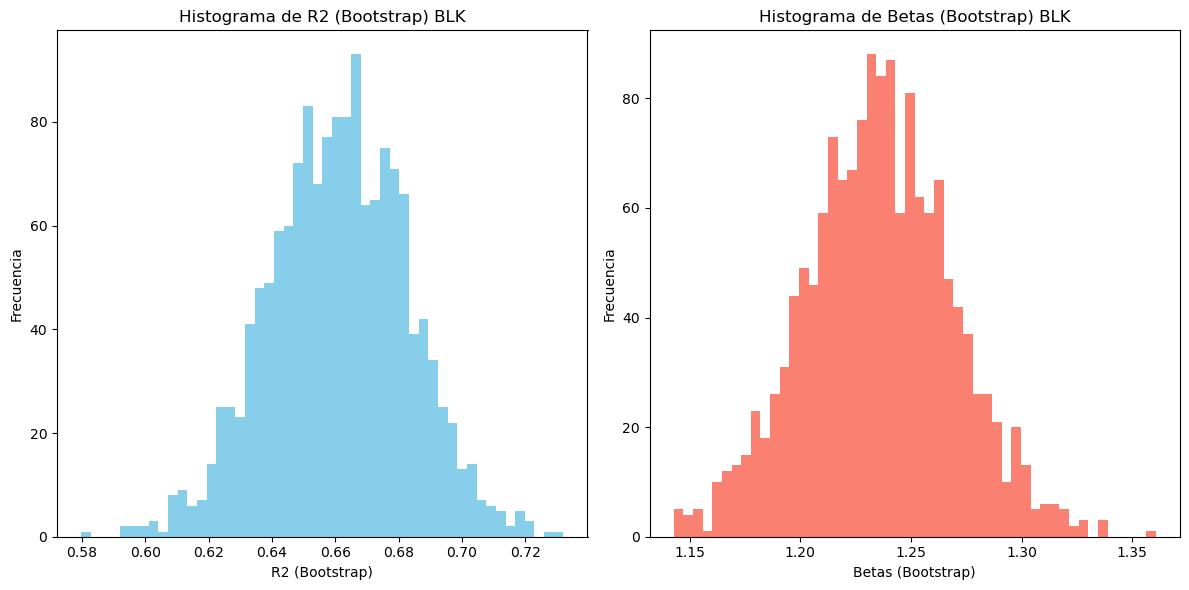

In [52]:
# Graficar histograma de R2 (Bootstrap) para BLK
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['BLK'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) BLK')

# Graficar histograma de BETAS (Bootstrap) para BLK
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['BLK'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) BLK')

plt.tight_layout()
plt.show()

# GOOGL

- **Elección del activo:** Se eligió ya que Google (Alphabet Inc.) es una de las empresas líderes en el sector tecnológico y de internet. 
- **Análisis de la acción:**
- **P/E ratio:** 26.37
- **Clase:** Alphabet Inc. cotiza en la bolsa de valores NASDAQ bajo el ticker "GOOGL".
- **¿Qué hace la empresa?:** Es una empresa multinacional estadounidense especializada en servicios y productos relacionados con la tecnología, incluyendo búsquedas en internet, publicidad en línea, computación en la nube, software y hardware, entre otros. Google es su principal subsidiaria y se dedica principalmente a servicios de búsqueda en internet, publicidad en línea, software y hardware.
- **¿Cuánto vale la empresa?:**

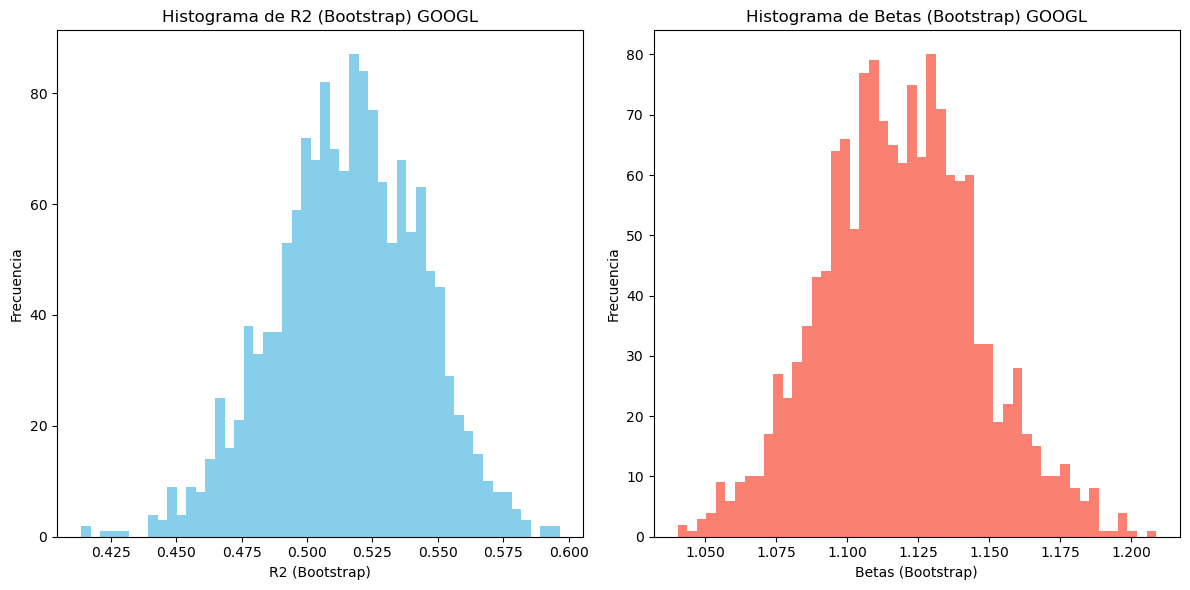

In [53]:
# Graficar histograma de R2 (Bootstrap) para GOOGL
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['GOOGL'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) GOOGL')

# Graficar histograma de BETAS (Bootstrap) para GOOGL
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['GOOGL'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) GOOGL')

plt.tight_layout()
plt.show()

# AAPL

- **Elección del activo:** Se eligió ya que es una de las empresas más grandes y reconocidas en el mundo, especialmente en el sector de la tecnología y la electrónica de consumo. Por su relevancia en los mercados financieros. 
- **Análisis de la acción:**
- **P/E ratio:** 26.2
- **Clase:** AAPL es una empresa de clase ordinaria, que cotiza en bolsa bajo el símbolo AAPL en mercados como el NASDAQ.
- **¿Qué hace la empresa?:** Es una empresa multinacional estadounidense que diseña, desarrolla y vende productos electrónicos, software y servicios en línea. Es conocida principalmente por su línea de productos iPhone, iPad, Mac, Apple Watch y Apple TV, así como por su software iOS, macOS, watchOS y tvOS. Apple también ofrece servicios como iCloud, iTunes, Apple Music, Apple Pay y App Store.
- **¿Cuánto vale la empresa?:**

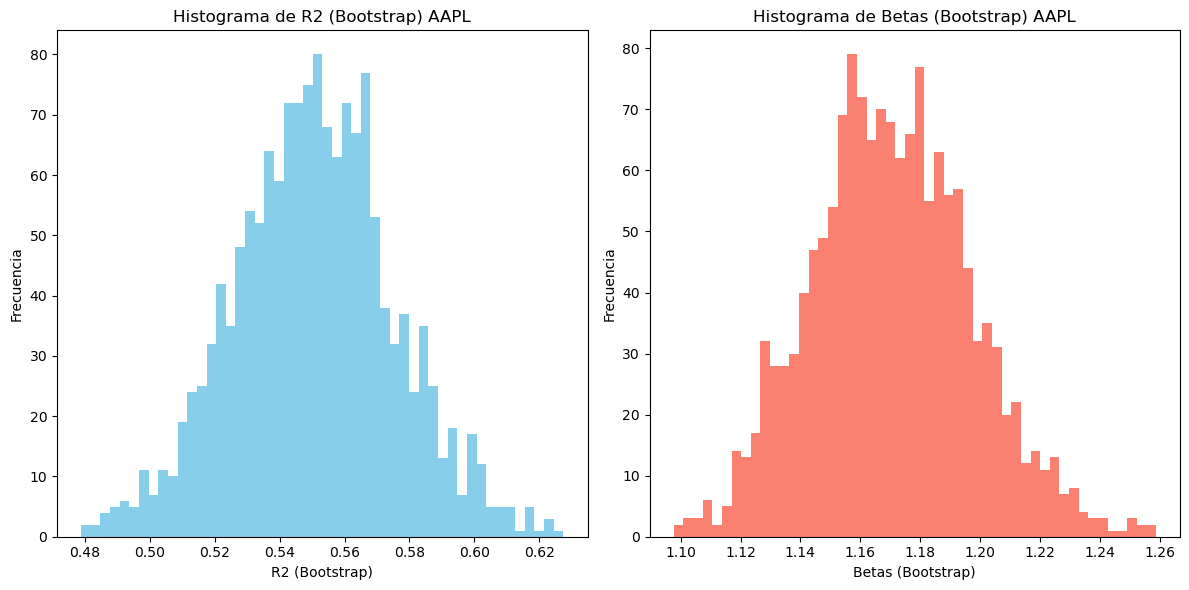

In [55]:
# Graficar histograma de R2 (Bootstrap) para AAPL
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['AAPL'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) AAPL')

# Graficar histograma de BETAS (Bootstrap) para AAPL
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['AAPL'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) AAPL')

plt.tight_layout()
plt.show()

# AMD

- **Elección del activo:** Se eligió ya que AMD (Advanced Micro Devices) es una empresa líder en la industria de semiconductores, conocida por su competencia en el mercado de procesadores de computadoras y tarjetas gráficas. 
- **Análisis de la acción:**
- **P/E ratio:**
- **Clase:** Se clasifica como una empresa de tecnología, específicamente en la industria de semiconductores.
- **¿Qué hace la empresa?:** Diseña y comercializa microprocesadores, tarjetas gráficas y soluciones de tecnología informática para consumidores, empresas y centros de datos. 
- **¿Cuánto vale la empresa?:**

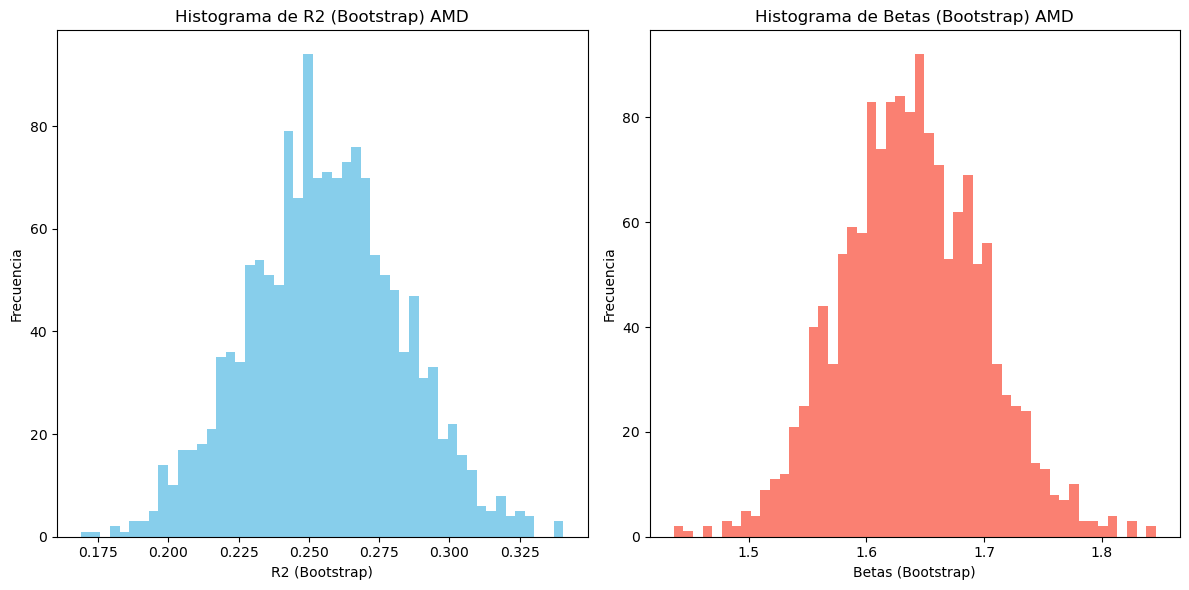

In [56]:
# Graficar histograma de R2 (Bootstrap) para AMD
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['AMD'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) AMD')

# Graficar histograma de BETAS (Bootstrap) para AMD
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['AMD'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) AMD')

plt.tight_layout()
plt.show()

# JPM

- **Elección del activo:** Se eligió debido a su relevancia en el mercado financiero, su posición en un sector específico y su desempeño histórico. 
- **Análisis de la acción:**
- **P/E ratio:**
- **Clase:** Pertenece al sector financiero y más específicamente al sector de servicios financieros diversificados.
- **¿Qué hace la empresa?:** JPMorgan Chase & Co. (JPM) es una empresa multinacional de servicios financieros que ofrece una amplia gama de servicios bancarios, de inversión, gestión de activos, gestión patrimonial, servicios financieros corporativos y otros servicios financieros a clientes corporativos, institucionales y minoristas en todo el mundo.
- **¿Cuánto vale la empresa?:**

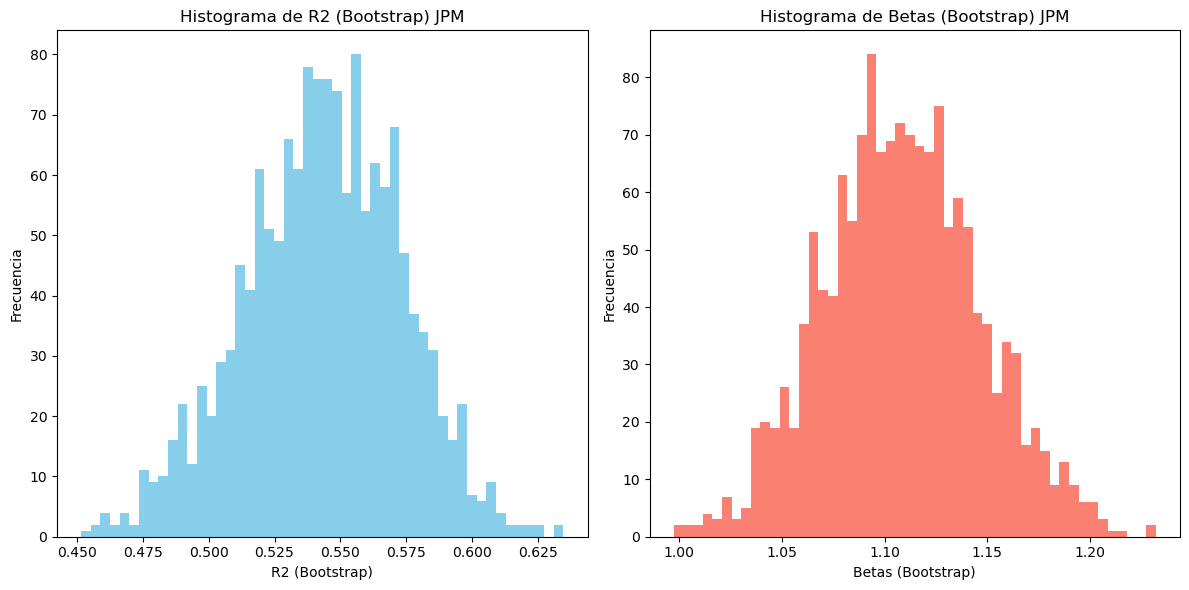

In [57]:
# Graficar histograma de R2 (Bootstrap) para JPM
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['JPM'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) JPM')

# Graficar histograma de BETAS (Bootstrap) para JPM
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['JPM'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) JPM')

plt.tight_layout()
plt.show()

# MSFT

- **Elección del activo:** Se eligió ya que es una de las empresas más grandes y reconocidas en el mundo de la tecnología. Tambipen debidoa a su estabilidad, su posición dominante en varios mercados tecnológicos clave y su historial de crecimiento constante. 
- **Análisis de la acción:**
- **P/E ratio:**
- **Clase:** Es una empresa de tecnología de la información. Sus acciones cotizan en bolsa y suelen clasificarse como acciones de tecnología o software en los mercados financieros.
- **¿Qué hace la empresa?:** Microsoft es una empresa multinacional de tecnología que desarrolla, fabrica, licencia y vende una amplia gama de productos y servicios relacionados con la informática. 
- **¿Cuánto vale la empresa?:**

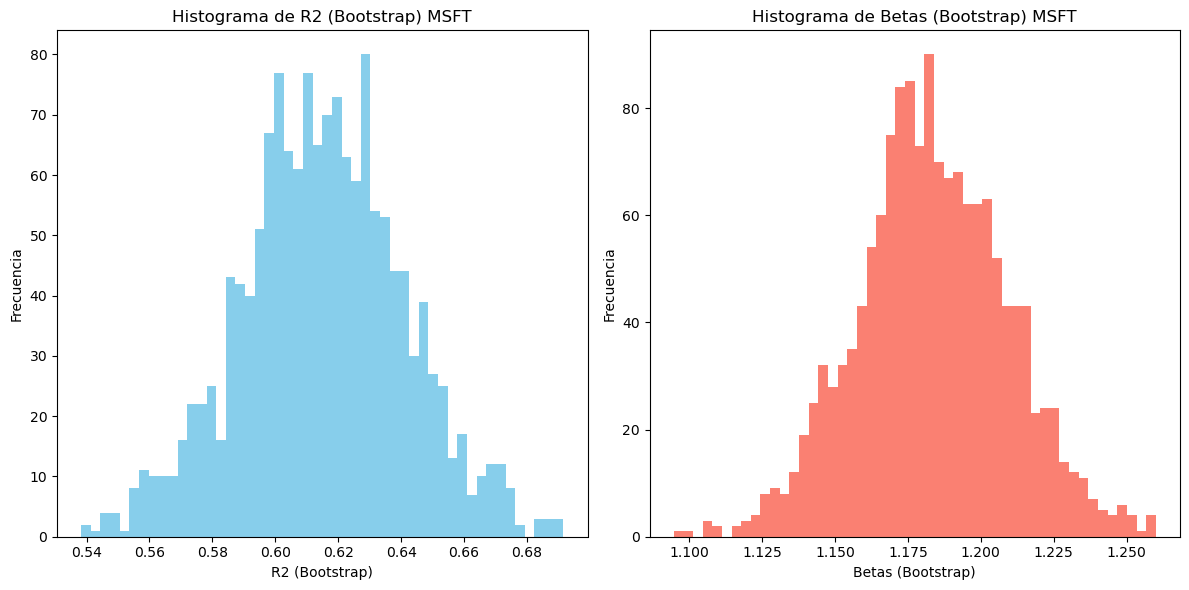

In [58]:
# Graficar histograma de R2 (Bootstrap) para MSFT
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['MSFT'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) MSFT')

# Graficar histograma de BETAS (Bootstrap) para MSFT
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['MSFT'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) MSFT')

plt.tight_layout()
plt.show()

# META

- **Elección del activo:**
- **Análisis de la acción:**
- **P/E ratio:**
- **Clase:**
- **¿Qué hace la empresa?:**
- **¿Cuánto vale la empresa?:**

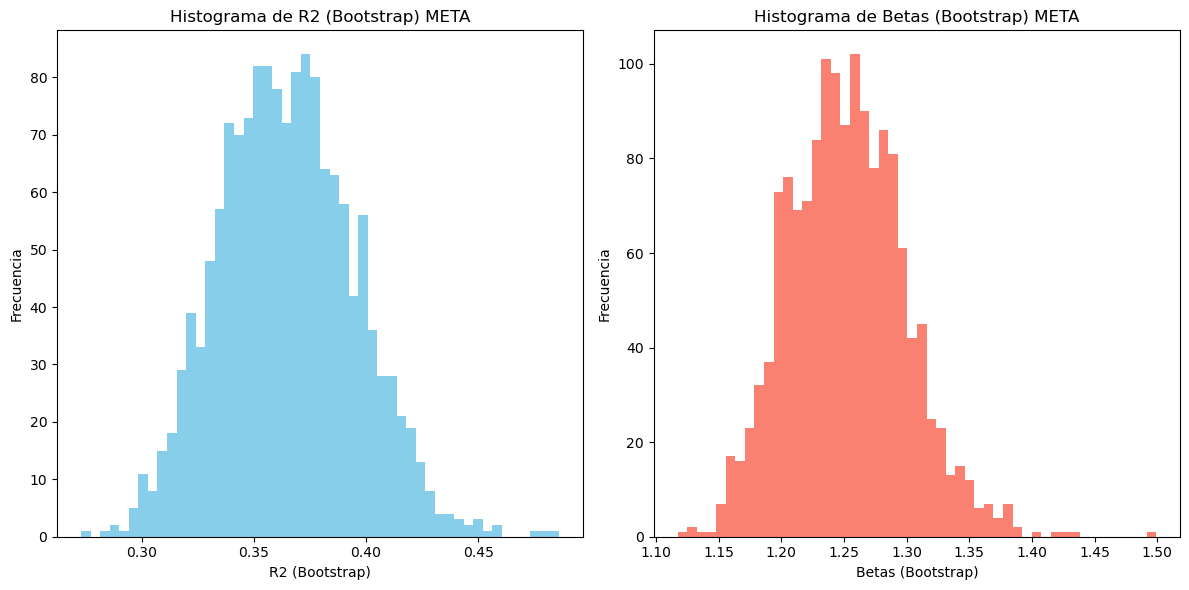

In [59]:
# Graficar histograma de R2 (Bootstrap) para META
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['META'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) META')

# Graficar histograma de BETAS (Bootstrap) para META
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['META'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) META')

plt.tight_layout()
plt.show()

# C

- Elección del activo:
- Análisis de la acción:
- P/E ratio:
- Clase:
- ¿Qué hace la empresa?:
- ¿Cuánto vale la empresa?:

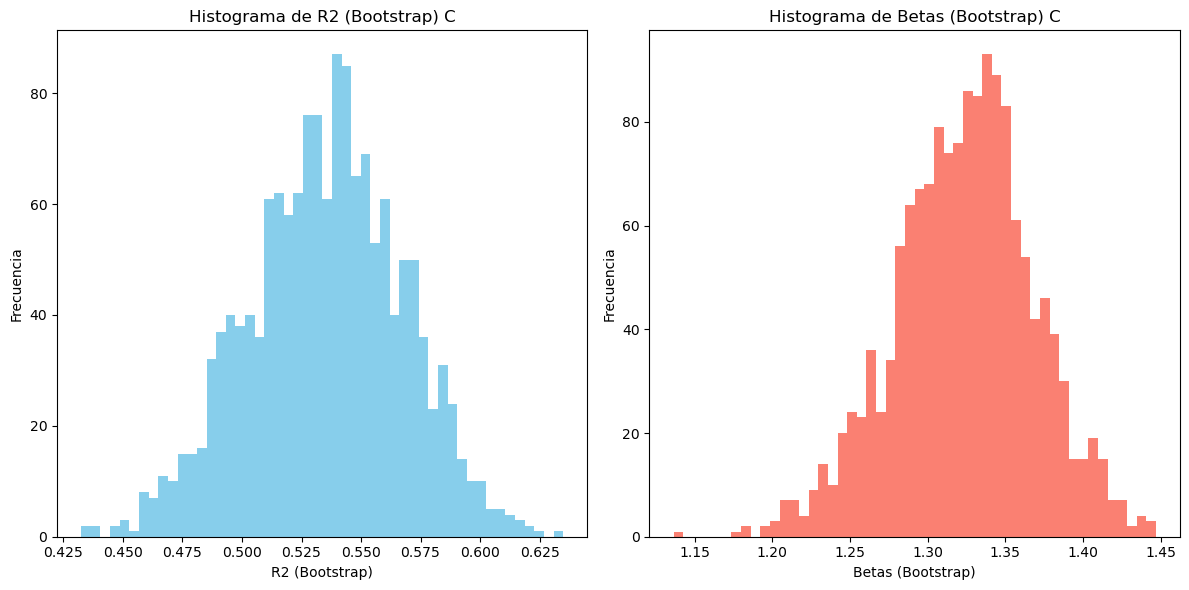

In [60]:
# Graficar histograma de R2 (Bootstrap) para C
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['C'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) C')

# Graficar histograma de BETAS (Bootstrap) para C
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['C'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) C')

plt.tight_layout()
plt.show()

# MA

- Elección del activo:
- Análisis de la acción:
- P/E ratio:
- Clase:
- ¿Qué hace la empresa?:
- ¿Cuánto vale la empresa?:

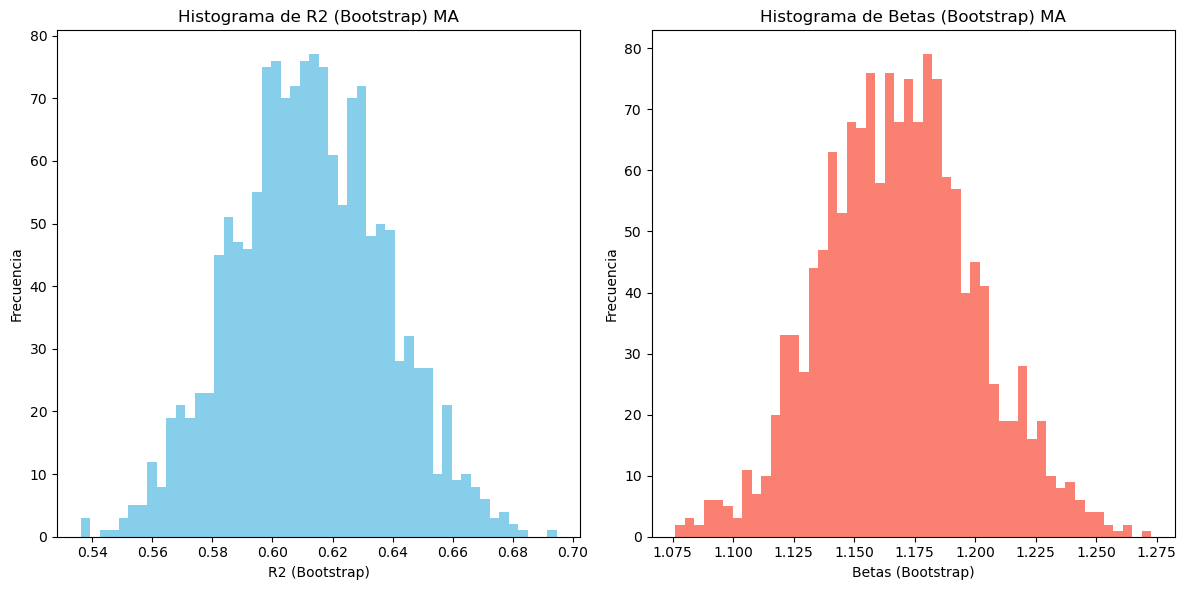

In [61]:
# Graficar histograma de R2 (Bootstrap) para MA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['MA'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) MA')

# Graficar histograma de BETAS (Bootstrap) para MA
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['MA'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) MA')

plt.tight_layout()
plt.show()

# SMCI

- **Elección del activo:**
- **Análisis de la acción:**
- **P/E ratio:**
- **Clase:** SMCI es clasificada como una acción de tecnología o informática.
- **¿Qué hace la empresa?:** Super Micro Computer, Inc. (SMCI) es una empresa de tecnología que diseña y fabrica servidores de alto rendimiento y soluciones de almacenamiento para centros de datos, empresas y clientes empresariales.
- **¿Cuánto vale la empresa?:**

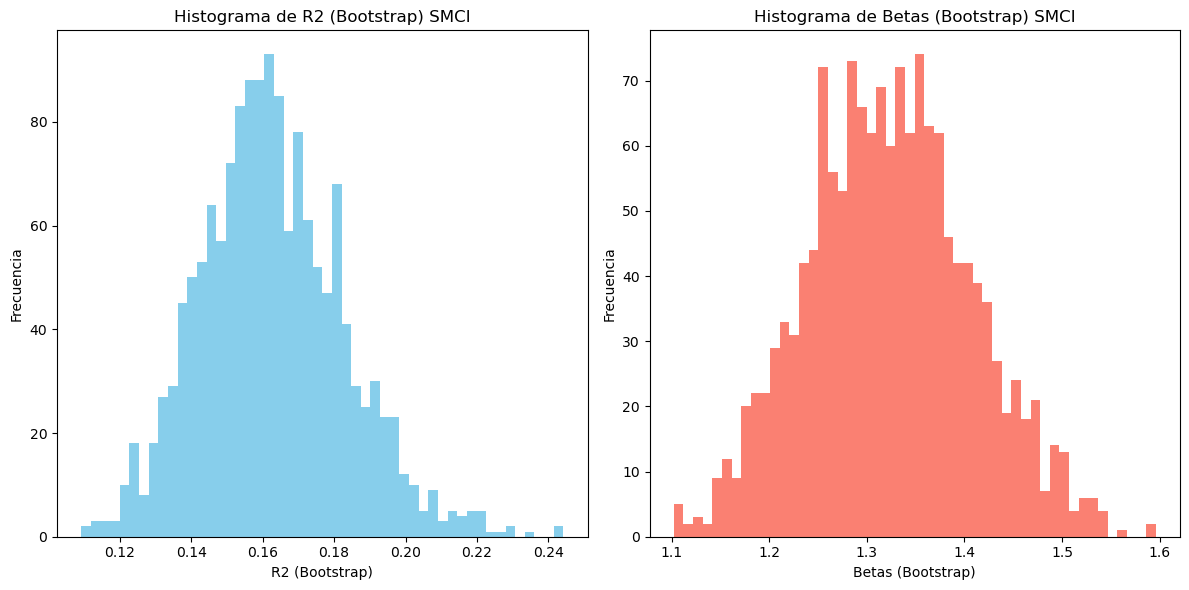

In [62]:
# Graficar histograma de R2 (Bootstrap) para SMCI
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['SMCI'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) SMCI')

# Graficar histograma de BETAS (Bootstrap) para SMCI
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['SMCI'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) SMCI')

plt.tight_layout()
plt.show()

# BA

- **Elección del activo:**
- **Análisis de la acción:**
- **P/E ratio:**
- **Clase:** 
- **¿Qué hace la empresa?:** 
- **¿Cuánto vale la empresa?:**

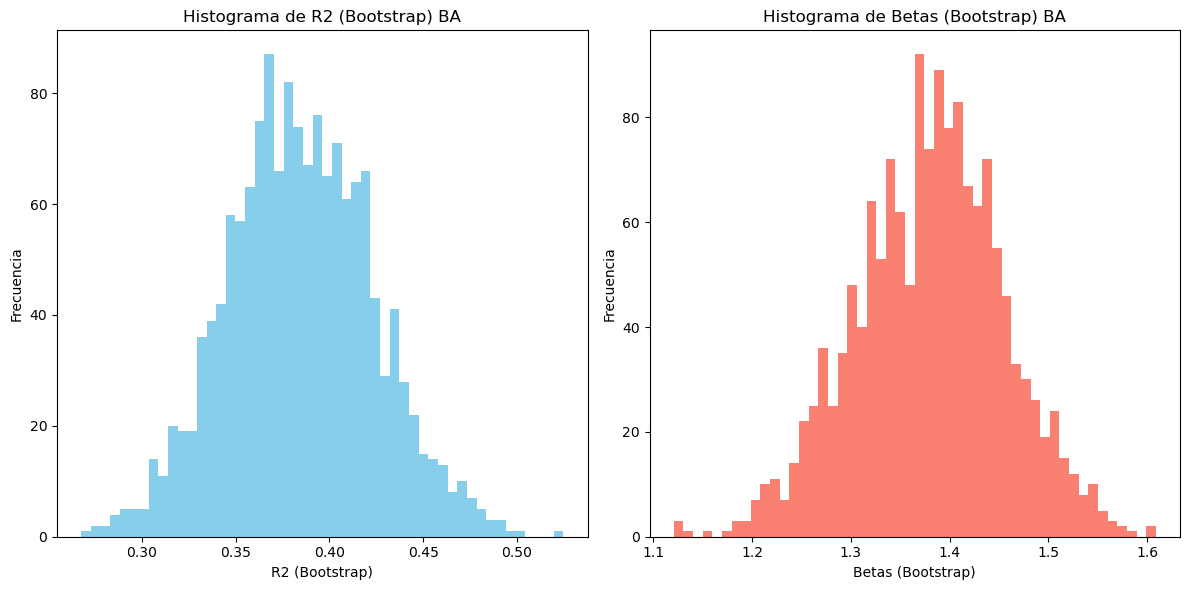

In [70]:
# Graficar histograma de R2 (Bootstrap) para BA
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.hist(r2_bootstrap['BA'], bins=50, color='skyblue')
plt.xlabel('R2 (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de R2 (Bootstrap) BA')

# Graficar histograma de BETAS (Bootstrap) para BA
plt.subplot(1, 2, 2)
plt.hist(betas_bootstrap['BA'], bins=50, color='salmon')
plt.xlabel('Betas (Bootstrap)')
plt.ylabel('Frecuencia')
plt.title('Histograma de Betas (Bootstrap) BA')

plt.tight_layout()
plt.show()

## 2. Selección de portafolios

Una vez elegidos los activos y/o ETFs:

1. Usando los precios históricos de dichos activos hasta el 2015-12-31 (la fecha inicial es un parámetro que ustedes deberán elegir), diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2016. Para esto, deberán suponer un coeficiente de aversión al riesgo.

2. Usando los precios históricos de dichos activos hasta el 2016-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2017.

3. Usando los precios históricos de dichos activos hasta el 2017-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2018.

4. Usando los precios históricos de dichos activos hasta el 2018-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2019.

5. Usando los precios históricos de dichos activos hasta el 2019-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2020.

6. Usando los precios históricos de dichos activos hasta el 2020-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2021.

7. Usando los precios históricos de dichos activos hasta el 2021-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2022.

8. Usando los precios históricos de dichos activos hasta el 2022-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2023.

9. Usando los precios históricos de dichos activos hasta el 2023-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2024.

10. Usando los precios históricos de dichos activos hasta el 2024-12-31, diseñarán un portafolio en el que (hipotéticamente) habrían invertido durante todo el 2024.

In [125]:
import numpy as np
import pandas as pd
import yfinance as yf
from IPython.display import display

# Lista de años
years = range(2016, 2025)

# Diccionario para almacenar los resultados de cada año
portfolios = {}

# Ciclo for para cada año
for year in years:
    # Definir tickers, fechas de inicio y fin para el año actual
    tickers = ['NVDA', 'AMZN', 'TSLA', 'NFLX', 'BLK', 'GOOGL', 'AAPL', 'AMD', 'JPM', 'MSFT', 'META', 'C', 'MA', 'SMCI', 'BA']
    start_date = f'{year-11}-01-01'  
    end_date = f'{year-1}-12-31'      
    
    # Descargar datos históricos
    st = yf.download(tickers, start_date, end_date, interval='1d')['Adj Close']
    rt = st.pct_change().dropna()
    
    # Calcular rendimientos esperados y volatilidades
    summary = pd.DataFrame({
        'means': rt.mean() * 252,
        'volatility': rt.std() * np.sqrt(252)
    })
    sigma = rt.cov()
    rf = 0.1104
    n_port = 100000
    n_act = len(rt.keys())
    W = np.random.dirichlet((1,) * n_act, size=n_port)
    rendimientos = W.dot(rt.mean()) * 252
    zeros = np.zeros(n_port)
    for i in range(len(zeros)):
        zeros[i] = np.sqrt(W[i, :].dot(sigma).dot(W[i, :])) * np.sqrt(252)
    volatility = zeros
    sharpe = (rendimientos - rf) / volatility
    
    # Almacenar resultados en un DataFrame
    resultados = pd.DataFrame({
        'expected_value': rendimientos, 
        'volatility': volatility,
        'sharpe': sharpe
    })
    for i, ticker in enumerate(tickers):
        resultados[f'w_{ticker}'] = W[:, i]
    
    # Encontrar portafolio de máxima relación de Sharpe
    emv = resultados[resultados.sharpe == resultados.sharpe.max()]
    
    # Calcular pesos óptimos
    emv_volatility = emv.volatility.values[0]
    emv_expected_value = emv.expected_value.values[0]
    alpha = np.linspace(1, 20, 20)
    w_opt = pd.DataFrame({
        'w_stocks': (emv_expected_value - rf) / (alpha * emv_volatility ** 2),
        'w_cetes': 1 - (emv_expected_value - rf) / (alpha * emv_volatility ** 2)
    })
    
    # Calcular pesos finales
    pesos = emv * w_opt.w_stocks[3]
    pesos = pesos.drop(['expected_value', 'volatility', 'sharpe'], axis=1)
    pesos['BONDS'] = w_opt.w_cetes[3]
    
    # Almacenar los pesos en el diccionario de portafolios
    portfolios[year] = pesos

# Mostrar los pesos de cada portafolio en una tabla
for year, pesos in portfolios.items():
    print(f"Portafolio {year}:")
    display(pesos)
    print()


[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
[*********************100%%**********************]  15 of 15 completed
Portafolio 2016:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
45087,0.012884,0.000625,0.015738,0.083976,0.046534,0.008181,0.101701,0.03739,0.032593,0.029169,0.056797,0.431374,0.102169,0.04671,0.399228,-0.40507



Portafolio 2017:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
9931,0.017935,0.017543,0.051472,0.006965,0.07894,0.097364,0.011926,0.130866,0.058749,0.05871,0.045667,0.258962,0.60552,0.020644,0.201655,-0.662919



Portafolio 2018:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
90743,0.014163,0.008018,0.144729,0.438778,0.018633,0.030176,0.04338,0.220296,0.088012,0.014128,0.054501,0.245988,0.601312,0.044821,0.098053,-1.064988



Portafolio 2019:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
75323,0.063301,0.01698,0.147594,0.41741,0.037215,0.002441,0.080802,0.005589,0.009436,0.006132,0.025534,0.298421,0.209974,0.001603,0.096368,-0.418799



Portafolio 2020:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
51853,0.0665,0.031527,0.022794,0.026955,0.015471,0.009535,0.000201,0.18539,0.169391,0.029886,0.011381,0.32124,0.348244,0.000513,0.073253,-0.31228



Portafolio 2021:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
22483,0.009776,0.047486,0.085845,0.052376,0.059053,0.001352,0.0134,0.014355,0.007255,0.003859,0.008186,0.227934,0.251618,0.024232,0.313416,-0.120144



Portafolio 2022:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
68070,0.01396,0.038054,0.03574,0.033041,0.036062,0.011617,0.002658,0.011375,0.054226,0.021849,0.040504,0.287887,0.253232,0.008305,0.282596,-0.131106



Portafolio 2023:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
8227,0.003346,0.00228,0.001956,0.005542,0.067711,0.001424,0.047674,0.039703,0.009337,0.014199,0.005618,0.133073,0.194695,0.059555,0.18616,0.227727



Portafolio 2024:


,w_NVDA,w_AMZN,w_TSLA,w_NFLX,w_BLK,w_GOOGL,w_AAPL,w_AMD,w_JPM,w_MSFT,w_META,w_C,w_MA,w_SMCI,w_BA,BONDS
15331,0.020653,0.094124,0.070075,0.025373,0.019789,0.003851,0.019345,0.010619,0.00299,0.005742,0.008597,0.102769,0.196328,0.106465,0.194368,0.11891


## 3. Evaluación del rendimiento (40%)

Usando los portafolios que encontraron en el punto anterior, deberán encontrar:

1. El rendimiento del portafolio 1 durante el 2016.

2. El rendimiento del portafolio 2 durante el 2017.

3. El rendimiento del portafolio 3 durante el 2018.

4. El rendimiento del portafolio 4 durante el 2019.

5. El rendimiento del portafolio 5 durante el 2020.

6. El rendimiento del portafolio 6 durante el 2021.

7. El rendimiento del portafolio 6 durante el 2022.

8. El rendimiento del portafolio 7 durante el 2023.

9. El rendimiento del portafolio 7 durante el 2024.

10. El rendimiento total durante  el periodo de tenencia.

11. El rendimiento promedio anual durante el periodo de tenencia.

11. Si hubieran invertido 10.000 USD en estos portafolios a lo largo del tiempo y nunca hubieran retirado ni adicionado nada más, ¿Cuánto dinero tendrían invertido en este momento?

In [127]:
import yfinance as yf
import pandas as pd

# Definir los tickers de las acciones y los bonos de EE. UU.
tickers = ['NVDA', 'AMZN', 'TSLA', 'NFLX', 'BLK', 'GOOGL', 'AAPL', 'AMD', 'JPM', 'MSFT', 'META', 'C', 'MA', 'SMCI', 'BA', '^TNX']

# Lista de años
years = range(2016, 2025)

# Diccionario para almacenar los rendimientos anuales promedio para cada activo
annual_returns_all_years = {}

# Ciclo for para cada año
for year in years:
    # Obtener los datos históricos de precios para el año actual
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    historical_data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']

    # Calcular los rendimientos diarios
    daily_returns = historical_data.pct_change()

    # Calcular los rendimientos anuales promedio para cada activo
    annual_returns = daily_returns.mean() * 252 # 252 días hábiles en un año

    # Almacenar los rendimientos anuales promedio en el diccionario
    annual_returns_all_years[year] = annual_returns

# Crear un DataFrame a partir del diccionario de rendimientos anuales
df_annual_returns = pd.DataFrame(annual_returns_all_years)

# Imprimir los rendimientos anuales promedio para cada activo
print("Rendimientos Anuales Promedio:")
df_annual_returns



[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
[*********************100%%**********************]  16 of 16 completed
Rendimientos Anuales Promedio:


,2016,2017,2018,2019,2020,2021,2022,2023,2024
AAPL,0.144534,0.411191,-0.042448,0.668335,0.697806,0.360158,-0.270522,0.462402,-0.185047
AMD,1.743335,0.067222,0.687909,1.032469,0.818380,0.546976,-0.660491,0.953830,0.583090
AMZN,0.206102,0.464568,0.285628,0.209876,0.625486,0.086196,-0.586943,0.632897,0.619111
BA,0.165289,0.679319,0.133431,0.073234,-0.042234,0.062776,0.021544,0.328401,-1.096393
BLK,0.189750,0.320653,-0.213196,0.305079,0.473083,0.298498,-0.158639,0.185837,-0.119176
C,0.211006,0.237013,-0.313932,0.457002,-0.020750,0.068000,-0.241593,0.196161,0.552757
GOOGL,0.062768,0.278970,0.014601,0.269325,0.313310,0.561161,-0.425538,0.501408,0.626758
JPM,0.358452,0.241312,-0.062538,0.384901,0.064598,0.280179,-0.112997,0.284332,0.415469
MA,0.115127,0.382535,0.251711,0.483034,0.283790,0.072425,-0.007434,0.230397,0.270008
META,0.157644,0.430156,-0.237618,0.451609,0.366467,0.292711,-0.822084,1.132278,0.810291


In [132]:
rendimientos_por_año = {}

for año in range(2016, 2025):
    rendimiento = (
        portfolios[año].w_AAPL.values[0] * df_annual_returns[año][0] +
        portfolios[año].w_AMD.values[0] * df_annual_returns[año][1] +
        portfolios[año].w_AMZN.values[0] * df_annual_returns[año][2] +
        portfolios[año].w_BA.values[0] * df_annual_returns[año][3] +
        portfolios[año].w_BLK.values[0] * df_annual_returns[año][4] +
        portfolios[año].w_C.values[0] * df_annual_returns[año][5] +
        portfolios[año].w_GOOGL.values[0] * df_annual_returns[año][6] +
        portfolios[año].w_JPM.values[0] * df_annual_returns[año][7] +
        portfolios[año].w_MA.values[0] * df_annual_returns[año][8] +
        portfolios[año].w_META.values[0] * df_annual_returns[año][9] +
        portfolios[año].w_MSFT.values[0] * df_annual_returns[año][10] +
        portfolios[año].w_NFLX.values[0] * df_annual_returns[año][11] +
        portfolios[año].w_NVDA.values[0] * df_annual_returns[año][12] +
        portfolios[año].w_SMCI.values[0] * df_annual_returns[año][13] +
        portfolios[año].w_TSLA.values[0] * df_annual_returns[año][14] +
        portfolios[año].BONDS.values[0] * df_annual_returns[año][15]
    )
    rendimientos_por_año[año] = rendimiento    

In [134]:
df_rendimientos_por_año = pd.DataFrame.from_dict(rendimientos_por_año, orient='index', columns=['Rendimiento'])

df_rendimientos_por_año

,Rendimiento
2016,0.269575
2017,0.585492
2018,0.262460
2019,0.659834
2020,0.451937
2021,0.096351
2022,-0.329242
2023,0.337546
2024,0.508590


In [137]:
suma_rendimientos = sum(rendimientos_por_año.values())

print("Suma de los rendimientos por año:",suma_rendimientos)

Suma de los rendimientos por año: 2.8425435257541976


Vamos a cobrar el 0.5% de comisión sobre el importe que se quiera invertir. Nuestro cliente quiere invertir $10,000 USD y se tiene que pagar 10% de impuestos sobre la utilidad.

In [138]:
tasa_comision = 0.005  
tasa_impuestos = 0.10  

# Valor después de comisiones
valor_despues_comisiones = 10000 * (1 - tasa_comision)

# Valor después de impuestos
utilidad = suma_rendimientos * 10000
impuestos = utilidad * tasa_impuestos
valor_despues_impuestos = utilidad - impuestos

print("Valor después de impuestos:", valor_despues_impuestos)


Valor después de impuestos: 25582.89173178778


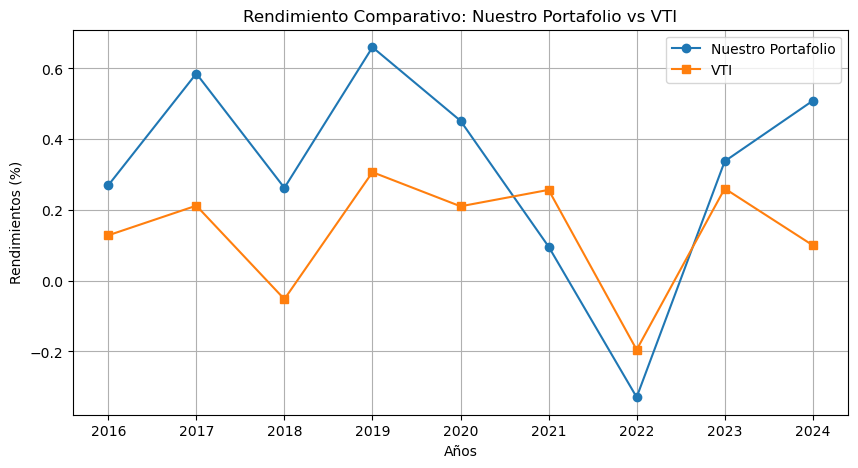

In [139]:
import matplotlib.pyplot as plt

años = ['2016','2017','2018','2019', '2020', '2021', '2022', '2023', '2024']
rendimiento_portafolio = [rendimientos_por_año[2016],rendimientos_por_año[2017],rendimientos_por_año[2018],rendimientos_por_año[2019],rendimientos_por_año[2020],rendimientos_por_año[2021],rendimientos_por_año[2022],rendimientos_por_año[2023],rendimientos_por_año[2024]]
rendimiento_VTI_porcentaje = [0.1283,0.2121,-0.0521,0.3067,0.2103,0.2567,-0.1951,0.2605,0.1001]

# Gráfica
plt.figure(figsize=(10, 5))
plt.plot(años, rendimiento_portafolio, marker='o', label='Nuestro Portafolio')
plt.plot(años, rendimiento_VTI_porcentaje, marker='s', label='VTI')


plt.title('Rendimiento Comparativo: Nuestro Portafolio vs VTI')
plt.xlabel('Años')
plt.ylabel('Rendimientos (%)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Tema extra de la carrera   (40%)
En base a investigacón o alguna cosa que vean en sus otras clases de la carrera (no se vale aplicar cosas de meditación, contexto historico, etc.) 



## 5. Presentación (10%)

Presentar punto 4